# Exploratory Data Analysis: Japanese Politeness Classifier

This notebook explores the labeled subtitle dataset used to train a classifier that predicts the level of politeness in Japanese dialogue. It includes basic statistics, label distributions, sentence lengths, and example lines from each class.


The goal is to better understand the structure and characteristics of the dataset before model training. We'll answer:
- How balanced are the politeness classes?
- What are the typical sentence lengths?
- Are there clear differences between classes?

This dataset now classifies Japanese dialogue lines into two **formality levels**:

| Label | Meaning         | Japanese Term(s)     | Description |
|-------|------------------|----------------------|-------------|
| **0** | Informal         | タメ口 / 普通         | Covers both casual and neutral/plain language. Includes slang, blunt commands, everyday speech, internal thoughts, or neutral narration. Common in peer conversations or informal settings. |
| **1** | Formal           | 敬語                  | Polite speech using です/ます forms, honorifics, or respectful expressions. Used in professional, respectful, or distant interactions. |

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(r"G:\Python Projects\politeness-classifier-jp\data\processed\BunnyGirl800-Preprocessed-binary.csv")

In [5]:
df.head(5)

,text,label,length
0,おい ムロ ちょっと来てくれ！,0,15
1,何か出てきやがった,0,9
2,あ…,0,2
3,なっ なんだ これは…,0,11
4,ムロ あんたの言ったとおりだ,0,14


In [6]:
df = df.dropna()

In [7]:
df["label"].value_counts()

label
0    451
1    356
Name: count, dtype: int64

In [8]:
df.shape

(807, 3)

## Class Distribution

Let's visualize how many samples we have for each politeness level to check for class imbalance.


<Axes: xlabel='label', ylabel='count'>

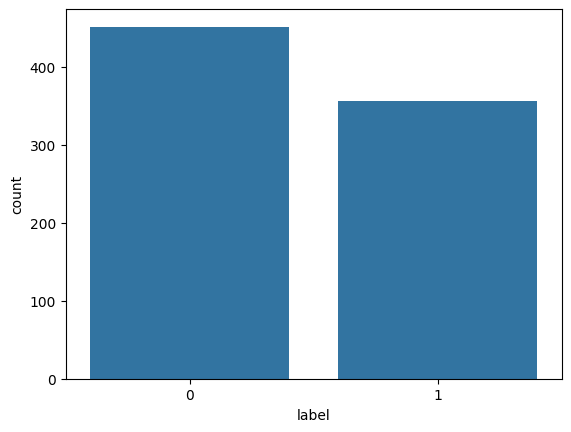

In [9]:
sns.countplot(data=df, x="label")

## Sentence Length Analysis

We examine the distribution of sentence lengths (in characters) to understand the input complexity and check for outliers.

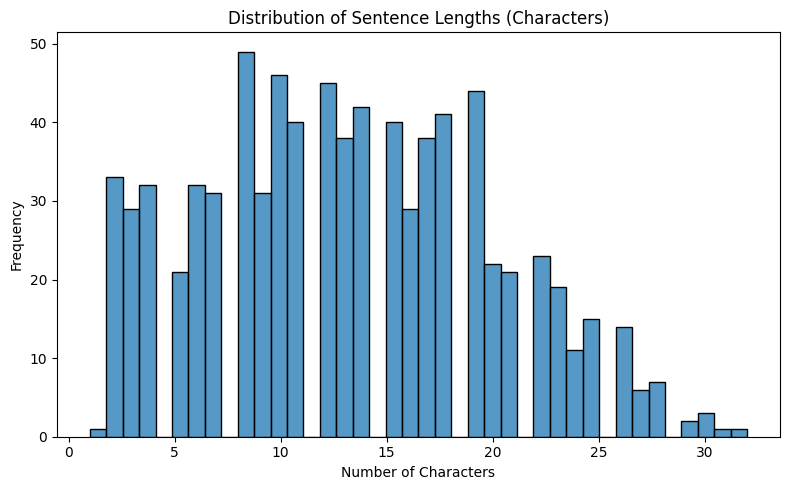

In [10]:
# Add a sentence length column
df["length"] = df["text"].str.len()

# Plot histogram of lengths
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="length", bins=40)
plt.title("Distribution of Sentence Lengths (Characters)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Sentence Length by Formality Level (Boxplot)

The boxplot below compares the number of characters per sentence across the two formality levels:

- **Informal (タメ口 / 普通)**  
- **Formal (敬語)**  

This visualization helps us understand whether sentence length correlates with the level of formality, which may influence model performance and feature design.

C:\Users\Daviidcito\AppData\Local\Temp\ipykernel_14424\972842030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="label", y="length", palette="pastel")


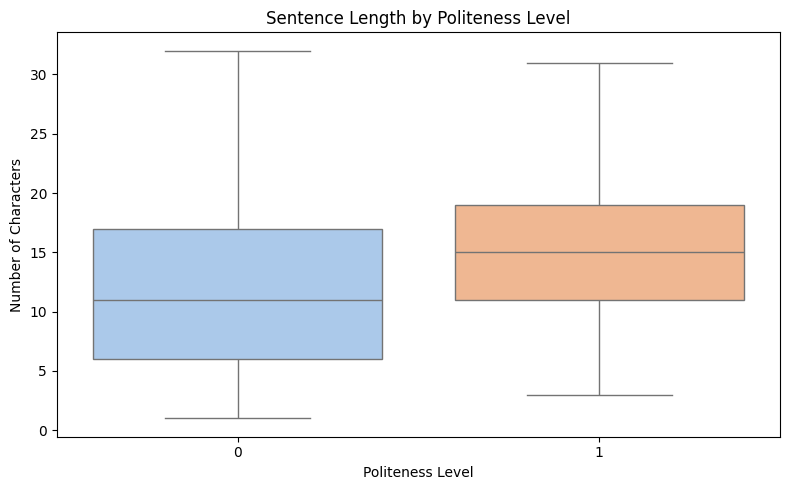

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="label", y="length", palette="pastel")
plt.title("Sentence Length by Politeness Level")
plt.xlabel("Politeness Level")
plt.ylabel("Number of Characters")
plt.tight_layout()
plt.show()

### Observations from Boxplot

In the binary classification setup, we observe that **formal (敬語)** sentences tend to be **longer on average** compared to informal ones. This aligns with expectations, as formal speech often involves:

- Additional grammatical structures (e.g., です/ます, 敬語 verbs)
- Polite modifiers and honorifics
- More structured, deliberate phrasing

In contrast, **informal (タメ口 / 普通)** sentences are generally shorter and more direct, often omitting particles, using contractions, or expressing emotion in a concise manner.

**Conclusion:** While sentence length shows some correlation with formality, it is **not sufficient** on its own for accurate classification. The model must learn to recognize **linguistic patterns**, such as specific verb forms, sentence-final particles, and honorific usage, to truly distinguish between informal and formal speech.

## Sample Sentences per Formality Level

Below are five randomly selected sentences from each formality category in the dataset:

- **0 — Informal (タメ口 / 普通):** Includes casual and plain speech used in relaxed settings, among friends, or in internal narration. Often omits particles or uses slang and contractions.
- **1 — Formal (敬語):** Polite speech that includes respectful grammar structures, such as です/ます forms, honorifics, and keigo expressions. Common in professional or distant interactions.

These samples help us verify that the binary labels reflect meaningful linguistic differences, and offer qualitative insight into how formality is expressed in Japanese dialogue.

In [13]:
# Sample 5 rows from each label class without adding a new column
preview_df = (
    df.groupby("label", group_keys=False)
    .apply(lambda x: x.sample(min(len(x), 5), random_state=42))
    .reset_index(drop=True)
)

# Show result (in local environment use this)
display(preview_df)

C:\Users\Daviidcito\AppData\Local\Temp\ipykernel_14424\2259092697.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), 5), random_state=42))


,text,label,length
0,その１人に お前が 選ばれたってわけさ,0,19
1,ギャー！,0,4
2,よく言うぜ！ どうせ つまようじだろ？,0,19
3,活動休止中とはいえ 芸能人じゃん？,0,17
4,お前は そこの掃除だ,0,10
5,あっ はい もう おなかいっぱいです,1,18
6,かの力に入隊できなかったんです,1,15
7,あなた方は 野球拳以外の ジャンケンを知らないんですか！,1,28
8,レバーを握るのが 遅れちゃうんですよね,1,19
9,世界にバグは不要です,1,10


## Temporary Conclusion

From this initial exploratory data analysis, we observe that:

- The dataset contains a clear distribution of **informal (label 0)** and **formal (label 1)** sentences.
- **Formal speech** tends to have **longer sentence lengths** on average, likely due to more structured grammar and honorific forms.
- A **wide range of sentence lengths** exists within both classes, suggesting that sentence length alone is not a reliable predictor of formality.

These findings highlight the importance of **contextual and linguistic features** for classification. Simple heuristics like length are insufficient — advanced models like BERT, which capture token-level and syntactic patterns, are better suited for this task.

Next steps include deeper token analysis, label distribution checks, and preparing the data for fine-tuning a transformer-based classifier.